# Benchmark RFE, validation-curve and learning-curve in classification of Breast Cancer Wisconsin (Diagnostic) Data Set

https://github.com/hkthirano/class/blob/master/rfe_validation_learning_curve.ipynb

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

from yellowbrick.model_selection import RFECV
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve


In [2]:
# training data
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# target data
breast_cancer_df_tgt = pd.DataFrame(breast_cancer_data.target, columns=['target'])
breast_cancer_df_tgt.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
breast_cancer_df_tgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


Number of Benign:  357
Number of Malignant :  212


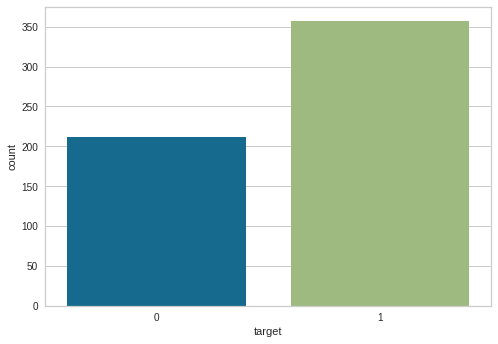

In [6]:
ax = sns.countplot(breast_cancer_df_tgt['target'],label="Count") 
B, M = breast_cancer_df_tgt['target'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

# Recursive Feature Elimination

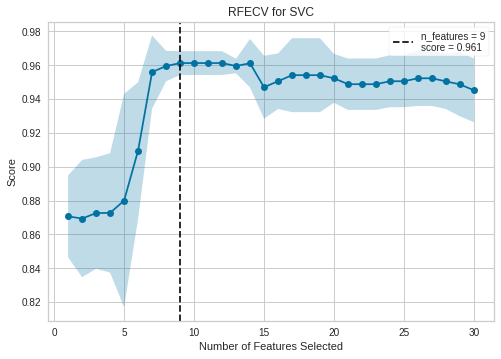

In [7]:
cv = StratifiedKFold(5)
rfecv = RFECV(SVC(kernel='linear', C=1), cv=cv, scoring='f1_weighted')

rfecv.fit(breast_cancer_df, breast_cancer_df_tgt)      # Fit the data to the visualizer
rfecv.show()                                           # Finalize and render the figure

# Validation Curve

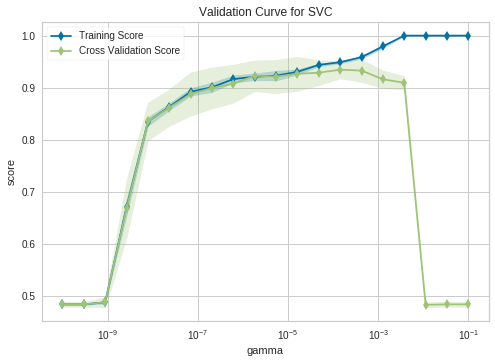

In [8]:
# Create the validation curve visualizer
param_range = np.logspace(-10, -1, 20)

valcv = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=16,
)

valcv.fit(breast_cancer_df, breast_cancer_df_tgt)
valcv.show()

# Learning Curve

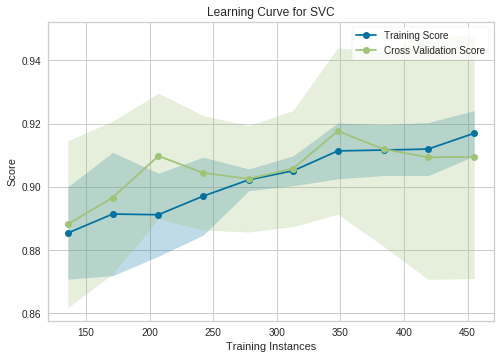

In [9]:
# Create the learning curve visualizer
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
learningcv = LearningCurve(
    SVC(), cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=16
)

learningcv.fit(breast_cancer_df, breast_cancer_df_tgt)  # Fit the data to the visualizer
learningcv.show()                                       # Finalize and render the figure